In [412]:
import os
import sys
import time
import numpy as np
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.cross_validation import train_test_split
# true, then pred
from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm

import matplotlib.pyplot as plt

import seaborn as sns
ns.set_style('white')
sns.set_context('notebook')

import pickle
from sklearn.externals import joblib

In [411]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.15',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.25,
 'figure.facecolor': 'white',
 'font.family': [u'sans-serif'],
 'font.sans-serif': [u'Arial',
  u'Liberation Sans',
  u'Bitstream Vera Sans',
  u'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': u'-',
 'image.cmap': u'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': u'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': u'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': u'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

In [ ]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [28]:
import amyutility as p2

In [29]:
reload(amyutility)

<module 'amyutility' from 'amyutility.py'>

# Load Data

In [6]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [78]:
print train.shape
print test.shape

(43436, 23)
(14479, 23)


In [7]:
traink = pd.read_csv('data/fromKen/full_train_2.csv')
testk = pd.read_csv('data/fromKen/full_test_2.csv')

In [79]:
print traink.shape
print testk.shape

(43436, 56)
(14479, 55)


# Data Exploration

In [36]:
test.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,Id
0,29.00,M,reg127,1,N,2,Y,N,N,nan,nan,2024.00,nan,N,N,nan,0,0,0,0,0,0,1
1,16.00,M,reg142,1,N,258,N,N,Y,2753.00,2751.00,2709.00,3528.00,N,N,nan,10,223,0,57,7,0,2
2,22.00,M,reg104,1,N,28,N,N,Y,nan,nan,1668.00,2910.00,N,N,nan,6,6,2,1,0,0,3
3,10.00,M,reg112,1,N,14,N,N,Y,nan,nan,741.00,1107.00,N,N,nan,13,13,0,2,1,0,4
4,14.00,F,reg106,1,N,131,N,N,N,359.00,325.00,531.00,654.00,N,N,nan,14,57,0,16,1,0,5


In [62]:
train.columns

Index([u'lapsed', u'age', u'sex', u'region', u'nregions', u'memtype', u'memmonths', u'mem_mag1', u'mem_mag2', u'hasemail', u'r1', u'r2', u'r3', u'r.quick', u'extra', u'intl', u'r.intl', u'allgames1yr', u'allgames5yr', u'fastevents', u'medevents', u'slowevents', u'nfloor'], dtype='object')

## Using Ken's Data

In [63]:
traink.columns

Index([u'lapsed', u'age', u'sex', u'region', u'nregions', u'memtype', u'memmonths', u'mem_mag1', u'mem_mag2', u'hasemail', u'r1', u'r2', u'r3', u'r.quick', u'extra', u'intl', u'r.intl', u'allgames1yr', u'allgames5yr', u'fastevents', u'medevents', u'slowevents', u'nfloor', u'age.na', u'r1.na', u'r2.na', u'r3.na', u'r.quick.na', u'r.intl.na', u'mon_less30', u'mon_31', u'mon_32', u'mon_33', u'mon_34', u'mon_35', u'mon_36', u'mon_37_60', u'mon_61_84', u'mon_85_120', u'mon_121_263', u'mon_264_plus',
       u'games_0', u'games_1_5', u'games_6_10', u'games_11_20', u'games_21_34', u'games_35_49', u'games_50_plus', u'agesq', u'agecbd', u'allgames1yrsq', u'allgames1yrcbd', u'allgames5yrsq', u'allgames5yrcbd', u'memmonthssq', u'memmonthscbd'],
      dtype='object')

In [64]:
testk.columns

Index([u'age', u'sex', u'region', u'nregions', u'memtype', u'memmonths', u'mem_mag1', u'mem_mag2', u'hasemail', u'r1', u'r2', u'r3', u'r.quick', u'extra', u'intl', u'r.intl', u'allgames1yr', u'allgames5yr', u'fastevents', u'medevents', u'slowevents', u'nfloor', u'age.na', u'r1.na', u'r2.na', u'r3.na', u'r.quick.na', u'r.intl.na', u'mon_less30', u'mon_31', u'mon_32', u'mon_33', u'mon_34', u'mon_35', u'mon_36', u'mon_37_60', u'mon_61_84', u'mon_85_120', u'mon_121_263', u'mon_264_plus',
       u'games_0', u'games_1_5', u'games_6_10', u'games_11_20', u'games_21_34', u'games_35_49', u'games_50_plus', u'agesq', u'agecbd', u'allgames1yrsq', u'allgames1yrcbd', u'allgames5yrsq', u'allgames5yrcbd', u'memmonthssq', u'memmonthscbd'],
      dtype='object')

In [65]:
traink.head()

,lapsed,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,Y,11.00,M,0.12,1,N,19,N,N,N,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99
1,N,61.00,M,0.12,1,N,198,Y,N,Y,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88
2,Y,16.00,F,0.12,1,N,192,N,N,Y,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79
3,Y,47.00,M,0.12,1,N,268,Y,N,Y,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78
4,Y,11.00,F,0.12,1,N,101,N,N,N,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87


In [66]:
testk.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,29.00,M,0.11,1,N,2,Y,N,N,1942.12,1811.61,2024.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,0,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,6.80,10.20,0.00,0.00,0.00,0.00,2.20,3.30
1,16.00,M,0.02,1,N,258,N,N,Y,2753.00,2751.00,2709.00,3528.00,N,N,3477.56,10,223,0,57,7,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,5.67,8.50,4.80,7.19,10.82,16.23,11.11,16.67
2,22.00,M,0.00,1,N,28,N,N,Y,1942.12,1811.61,1668.00,2910.00,N,N,3477.56,6,6,2,1,0,0,0,1,1,0,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,6.27,9.41,3.89,5.84,3.89,5.84,6.73,10.10
3,10.00,M,0.12,1,N,14,N,N,Y,1942.12,1811.61,741.00,1107.00,N,N,3477.56,13,13,0,2,1,0,0,1,1,0,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,4.80,7.19,5.28,7.92,5.28,7.92,5.42,8.12
4,14.00,F,0.04,1,N,131,N,N,N,359.00,325.00,531.00,654.00,N,N,3477.56,14,57,0,16,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,5.42,8.12,5.42,8.12,8.12,12.18,9.77,14.65


In [67]:
traink_y = traink[['lapsed']]

In [108]:
traink_y.head()

,lapsed
0,Y
1,N
2,Y
3,Y
4,Y


In [68]:
traink_x = traink.drop('lapsed', axis=1)

In [82]:
traink_x.shape

(43436, 55)

In [72]:
traink_x.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,11.00,M,0.12,1,N,19,N,N,N,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99
1,61.00,M,0.12,1,N,198,Y,N,Y,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88
2,16.00,F,0.12,1,N,192,N,N,Y,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79
3,47.00,M,0.12,1,N,268,Y,N,Y,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78
4,11.00,F,0.12,1,N,101,N,N,N,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87


In [95]:
train_y = (traink_y.lapsed.values=='Y')*1

In [96]:
# key train_y
train_y

array([1, 0, 1, ..., 0, 1, 0])

In [97]:
# key test_ids: for writing to predictions
test_ids = test.Id.values
test_ids

array([    1,     2,     3, ..., 14477, 14478, 14479])

In [98]:
# key df_all: combine test and train into df_all, test_idx 
test_idx = traink_x.shape[0]
df_all = pd.concat((traink_x, testk), axis=0)

In [99]:
print df_all.shape
print test_idx

(57915, 55)
43436


#### Key: 
- df_all
- test_idx
- train_y
- test_ids

## Missing Data 

In [424]:
sns.set_style('white')
sns.set_context('notebook')
sns.set(font_scale=1.5)

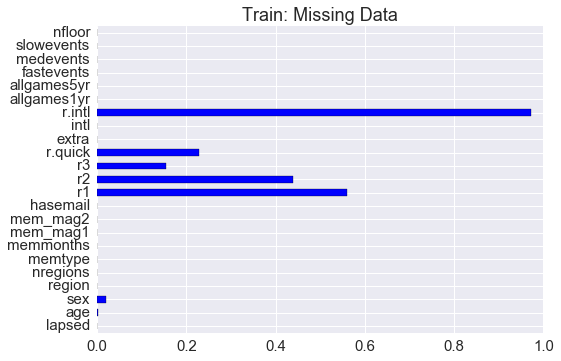

In [425]:
# original train data
missing = np.sum(train.isnull())/float(train.shape[0])
missing.plot(kind='barh', title='Train: Missing Data')
plt.show()

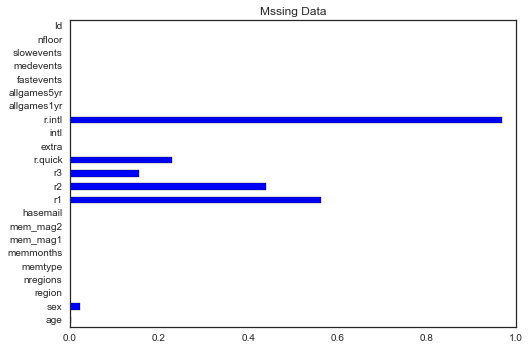

In [103]:
# original test data
missing = np.sum(test.isnull())/float(test.shape[0])
missing.plot(kind='barh', title='Test: Missing Data')
plt.show()

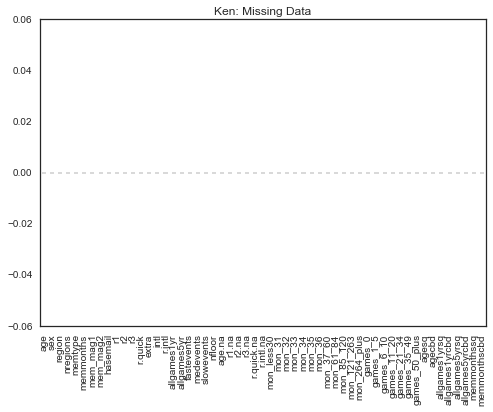

In [105]:
# Ken's data altogether
missing = np.sum(df_all.isnull())/float(df_all.shape[0])
missing.plot(kind='bar', title='Ken: Missing Data')
plt.show()

## Breakdown of Response Variables

No need to rebalance

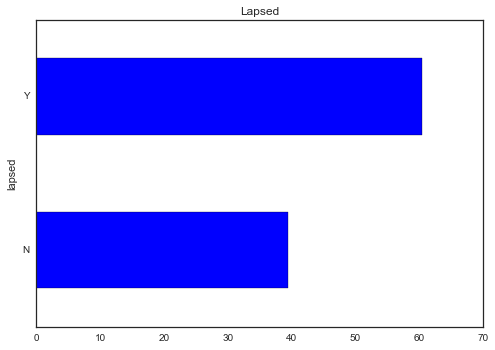

In [115]:
lapsed = train.groupby('lapsed').size().sort_values(ascending = True)/train.shape[0]*100
lapsed.plot(kind='barh', title = 'Lapsed')
plt.show()

## Check Types and Convert

- need to convert sex, memtype, mem_mag1, mem_mag2, hasemail, extra, intl
- Can leave bools alone

In [ ]:
# CONVERT = ['sex', 'memtype', 'mem_mag1', 'mem_mag2', 'hasemail', 'extra', 'intl']

### sex

- males 0
- females 1

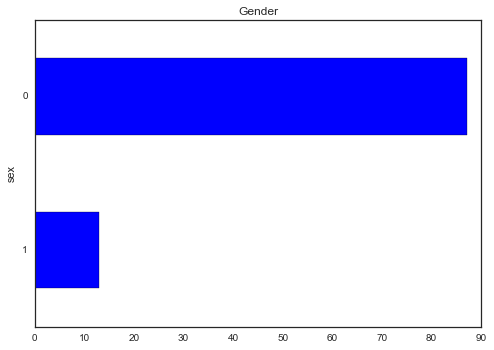

In [122]:
# mostly male (males 0, females 1)
gender = df_all.groupby('sex').size().sort_values(ascending = True)/df_all.shape[0]*100
gender.plot(kind='barh', title = 'Gender')
plt.show()

In [121]:
df_all.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,11.00,0,0.12,1,N,19,N,N,N,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99
1,61.00,0,0.12,1,N,198,Y,N,Y,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88
2,16.00,1,0.12,1,N,192,N,N,Y,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79
3,47.00,0,0.12,1,N,268,Y,N,Y,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78
4,11.00,1,0.12,1,N,101,N,N,N,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87


In [109]:
df_all.dtypes

age               float64
sex                object
region            float64
nregions            int64
memtype            object
memmonths           int64
mem_mag1           object
mem_mag2           object
hasemail           object
r1                float64
r2                float64
r3                float64
r.quick           float64
extra              object
intl               object
r.intl            float64
allgames1yr         int64
allgames5yr         int64
fastevents          int64
medevents           int64
slowevents          int64
nfloor              int64
age.na              int64
r1.na               int64
r2.na               int64
r3.na               int64
r.quick.na          int64
r.intl.na           int64
mon_less30           bool
mon_31               bool
mon_32               bool
mon_33               bool
mon_34               bool
mon_35               bool
mon_36               bool
mon_37_60            bool
mon_61_84            bool
mon_85_120           bool
mon_121_263 

In [112]:
df_all['sex']

0                 M
1                 M
2                 F
3                 M
4                 F
5                 F
6                 M
7                 M
8                 M
9                 M
10                M
11                M
12                M
13                M
14                M
15                F
16                M
17                M
18                F
19                M
20                M
21                F
22                M
23                M
24                M
25                M
26                M
27                M
28                F
29                M
30                M
31                M
32                M
33                F
34                M
35                M
36                M
37                M
38                M
39                F
40                M
41                M
42                M
43                F
44                M
45                M
46                M
47                M
48                M
49                M


In [113]:
df_all.sex = (df_all.sex.values=='F')*1

In [114]:
df_all.head()

,age,sex,region,nregions,memtype,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd
0,11.00,0,0.12,1,N,19,N,N,N,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99
1,61.00,0,0.12,1,N,198,Y,N,Y,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88
2,16.00,1,0.12,1,N,192,N,N,Y,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79
3,47.00,0,0.12,1,N,268,Y,N,Y,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78
4,11.00,1,0.12,1,N,101,N,N,N,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87


### memtype
- make Normal the reference category
- memtypeA=1 for affiliate
- memtypeF=1 for family

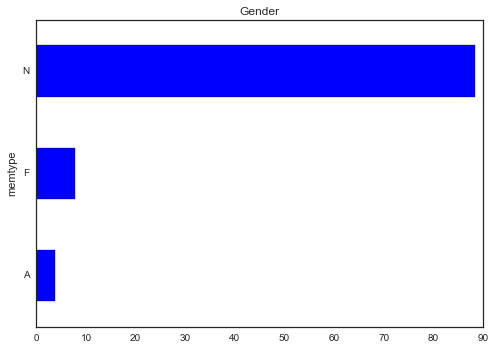

In [126]:
# membership types A, F, N 
memtye = df_all.groupby('memtype').size().sort_values(ascending = True)/df_all.shape[0]*100
memtype.plot(kind='barh', title = 'Memtype')
plt.show()

In [130]:
df_all['memtypeA'] = (df_all.memtype=='A')*1

In [131]:
df_all['memtypeF'] = (df_all.memtype=='F')*1

In [133]:
df_all = df_all.drop('memtype', axis=1)

### mem_mag1 & mem_mag2 & hasemail

- only yes or no... convert yes to 1, no to 0

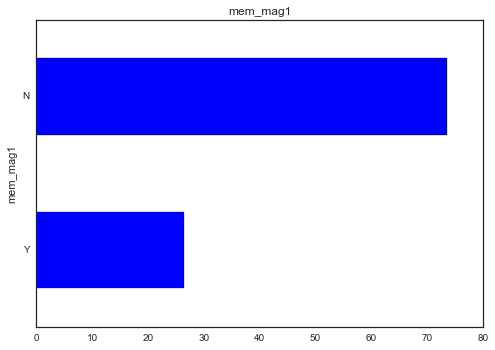

In [137]:
memmag1 = df_all.groupby('mem_mag1').size().sort_values(ascending = True)/df_all.shape[0]*100
memmag1.plot(kind='barh', title = 'mem_mag1')
plt.show()

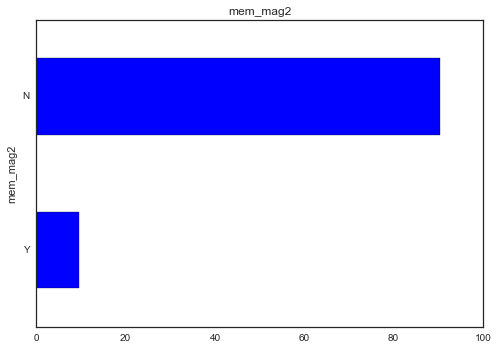

In [138]:
memmag2 = df_all.groupby('mem_mag2').size().sort_values(ascending = True)/df_all.shape[0]*100
memmag2.plot(kind='barh', title = 'mem_mag2')
plt.show()

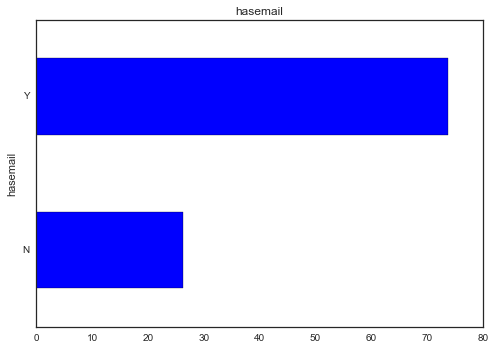

In [142]:
hasemail = df_all.groupby('hasemail').size().sort_values(ascending = True)/df_all.shape[0]*100
hasemail.plot(kind='barh', title = 'hasemail')
plt.show()

In [140]:
df_all.mem_mag1 = (df_all.mem_mag1.values=='Y')*1
df_all.mem_mag2 = (df_all.mem_mag2.values=='Y')*1

In [143]:
df_all.hasemail = (df_all.hasemail.values=='Y')*1

In [144]:
df_all.head()

,age,sex,region,nregions,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd,memtypeA,memtypeF
0,11.00,0,0.12,1,19,0,0,0,1942.12,1811.61,1557.56,2007.74,N,N,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99,0,0
1,61.00,0,0.12,1,198,1,0,1,2178.00,2215.00,2291.00,2932.00,Y,N,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88,0,0
2,16.00,1,0.12,1,192,0,0,1,627.00,628.00,1362.00,2007.00,N,N,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79,0,0
3,47.00,0,0.12,1,268,1,0,1,2600.00,2601.00,2602.00,2007.74,N,N,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78,0,0
4,11.00,1,0.12,1,101,0,0,0,464.00,466.00,958.00,1356.00,N,N,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87,0,0


### extra, intl

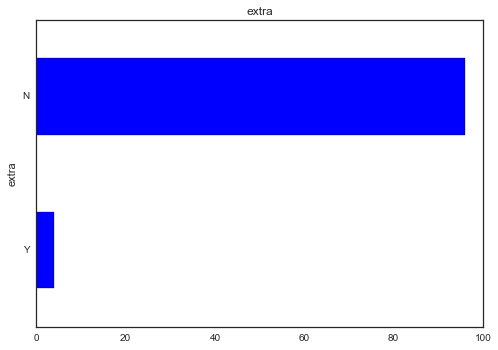

In [145]:
extra = df_all.groupby('extra').size().sort_values(ascending = True)/df_all.shape[0]*100
extra.plot(kind='barh', title = 'extra')
plt.show()

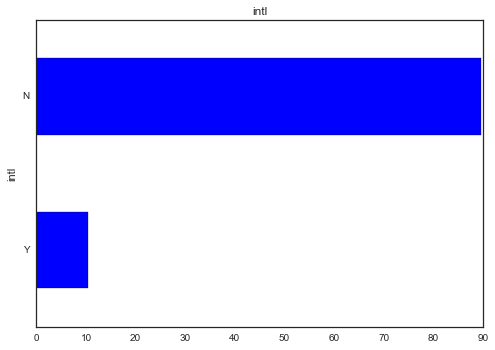

In [146]:
intl = df_all.groupby('intl').size().sort_values(ascending = True)/df_all.shape[0]*100
intl.plot(kind='barh', title = 'intl')
plt.show()

In [147]:
df_all.extra = (df_all.extra.values=='Y')*1
df_all.intl = (df_all.intl.values=='Y')*1

In [148]:
df_all.head()

,age,sex,region,nregions,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd,memtypeA,memtypeF
0,11.00,0,0.12,1,19,0,0,0,1942.12,1811.61,1557.56,2007.74,0,0,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99,0,0
1,61.00,0,0.12,1,198,1,0,1,2178.00,2215.00,2291.00,2932.00,1,0,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88,0,0
2,16.00,1,0.12,1,192,0,0,1,627.00,628.00,1362.00,2007.00,0,0,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79,0,0
3,47.00,0,0.12,1,268,1,0,1,2600.00,2601.00,2602.00,2007.74,0,0,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78,0,0
4,11.00,1,0.12,1,101,0,0,0,464.00,466.00,958.00,1356.00,0,0,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87,0,0


# Feature Engineering

In [428]:
# TODO region is discrete?? 
# last 8 are sq and cubed terms 
STANDARDIZE = ['age', 'region', 'nregions', 'memmonths', 'r1', 'r2', 'r3', 'r.quick', 'r.intl', 
               'allgames1yr', 'allgames5yr', 'fastevents', 'medevents', 'slowevents', 'nfloor']


INDICATORS = ['sex', 'mem_mag1', 'mem_mag2', 'hasemail', 'extra', 'intl', 'age.na', 'r1.na', 'r2.na', 
             'r3.na', 'r.quick.na', 'r.intl.na', 'memtypeA', 'memtypeF']

In [429]:
len(STANDARDIZE) + len(INDICATORS)

29

In [405]:
len(STANDARDIZE) 

23

In [406]:
len(INDICATORS)

33

In [157]:
df_all.shape[1]

56

## EDA - TODO HERE NOW

In [395]:
df_train_only = df_all[:test_idx]

In [396]:
df_train_only.shape

(43436, 56)

In [400]:
type(train_y)

numpy.ndarray

In [399]:
df_train_only['RESP'] = train_y

/Users/amylee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [402]:
train_y[:10]

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [403]:
df_train_only[:10]

,age,sex,region,nregions,memmonths,mem_mag1,mem_mag2,hasemail,r1,r2,r3,r.quick,extra,intl,r.intl,allgames1yr,allgames5yr,fastevents,medevents,slowevents,nfloor,age.na,r1.na,r2.na,r3.na,r.quick.na,r.intl.na,mon_less30,mon_31,mon_32,mon_33,mon_34,mon_35,mon_36,mon_37_60,mon_61_84,mon_85_120,mon_121_263,mon_264_plus,games_0,games_1_5,games_6_10,games_11_20,games_21_34,games_35_49,games_50_plus,agesq,agecbd,allgames1yrsq,allgames1yrcbd,allgames5yrsq,allgames5yrcbd,memmonthssq,memmonthscbd,memtypeA,memtypeF,RESP
0,11.00,0,0.12,1,19,0,0,0,1942.12,1811.61,1557.56,2007.74,0,0,3477.56,0,0,0,0,0,0,0,1,1,1,1,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4.97,7.45,0.00,0.00,0.00,0.00,5.99,8.99,0,0,1
1,61.00,0,0.12,1,198,1,0,1,2178.00,2215.00,2291.00,2932.00,1,0,3477.56,4,29,1,0,10,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,8.25,12.38,3.22,4.83,6.80,10.20,10.59,15.88,0,0,0
2,16.00,1,0.12,1,192,0,0,1,627.00,628.00,1362.00,2007.00,0,0,3477.56,29,29,0,4,1,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,5.67,8.50,6.80,10.20,6.80,10.20,10.53,15.79,0,0,1
3,47.00,0,0.12,1,268,1,0,1,2600.00,2601.00,2602.00,2007.74,0,0,3477.56,0,0,0,0,0,0,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,7.74,11.61,0.00,0.00,0.00,0.00,11.19,16.78,0,0,1
4,11.00,1,0.12,1,101,0,0,0,464.00,466.00,958.00,1356.00,0,0,3477.56,12,35,0,8,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,4.97,7.45,5.13,7.69,7.17,10.75,9.25,13.87,0,0,1
5,10.00,1,0.01,1,22,0,0,1,1942.12,1811.61,648.00,917.00,0,0,3477.56,7,7,0,2,0,0,0,1,1,0,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,4.80,7.19,4.16,6.24,4.16,6.24,6.27,9.41,0,0,0
6,80.00,0,0.01,2,449,1,0,1,2777.00,2778.00,2779.00,3870.00,0,0,3477.56,0,0,0,0,0,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,8.79,13.18,0.00,0.00,0.00,0.00,12.22,18.33,0,0,0
7,9.00,0,0.03,1,30,0,0,1,1942.12,1811.61,965.00,1358.00,0,0,3477.56,4,4,0,1,0,0,0,1,1,0,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,4.61,6.91,3.22,4.83,3.22,4.83,6.87,10.30,0,0,0
8,12.00,0,0.09,1,124,0,0,1,1656.00,1594.00,2004.00,2802.00,0,0,3477.56,45,139,0,35,2,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,5.13,7.69,7.66,11.49,9.88,14.82,9.66,14.48,0,0,1
9,59.00,0,0.02,1,193,1,0,1,2092.00,2095.00,2098.00,2703.00,1,0,3477.56,13,72,4,4,18,0,0,0,0,0,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,8.19,12.28,5.28,7.92,8.58,12.87,10.54,15.80,0,0,1


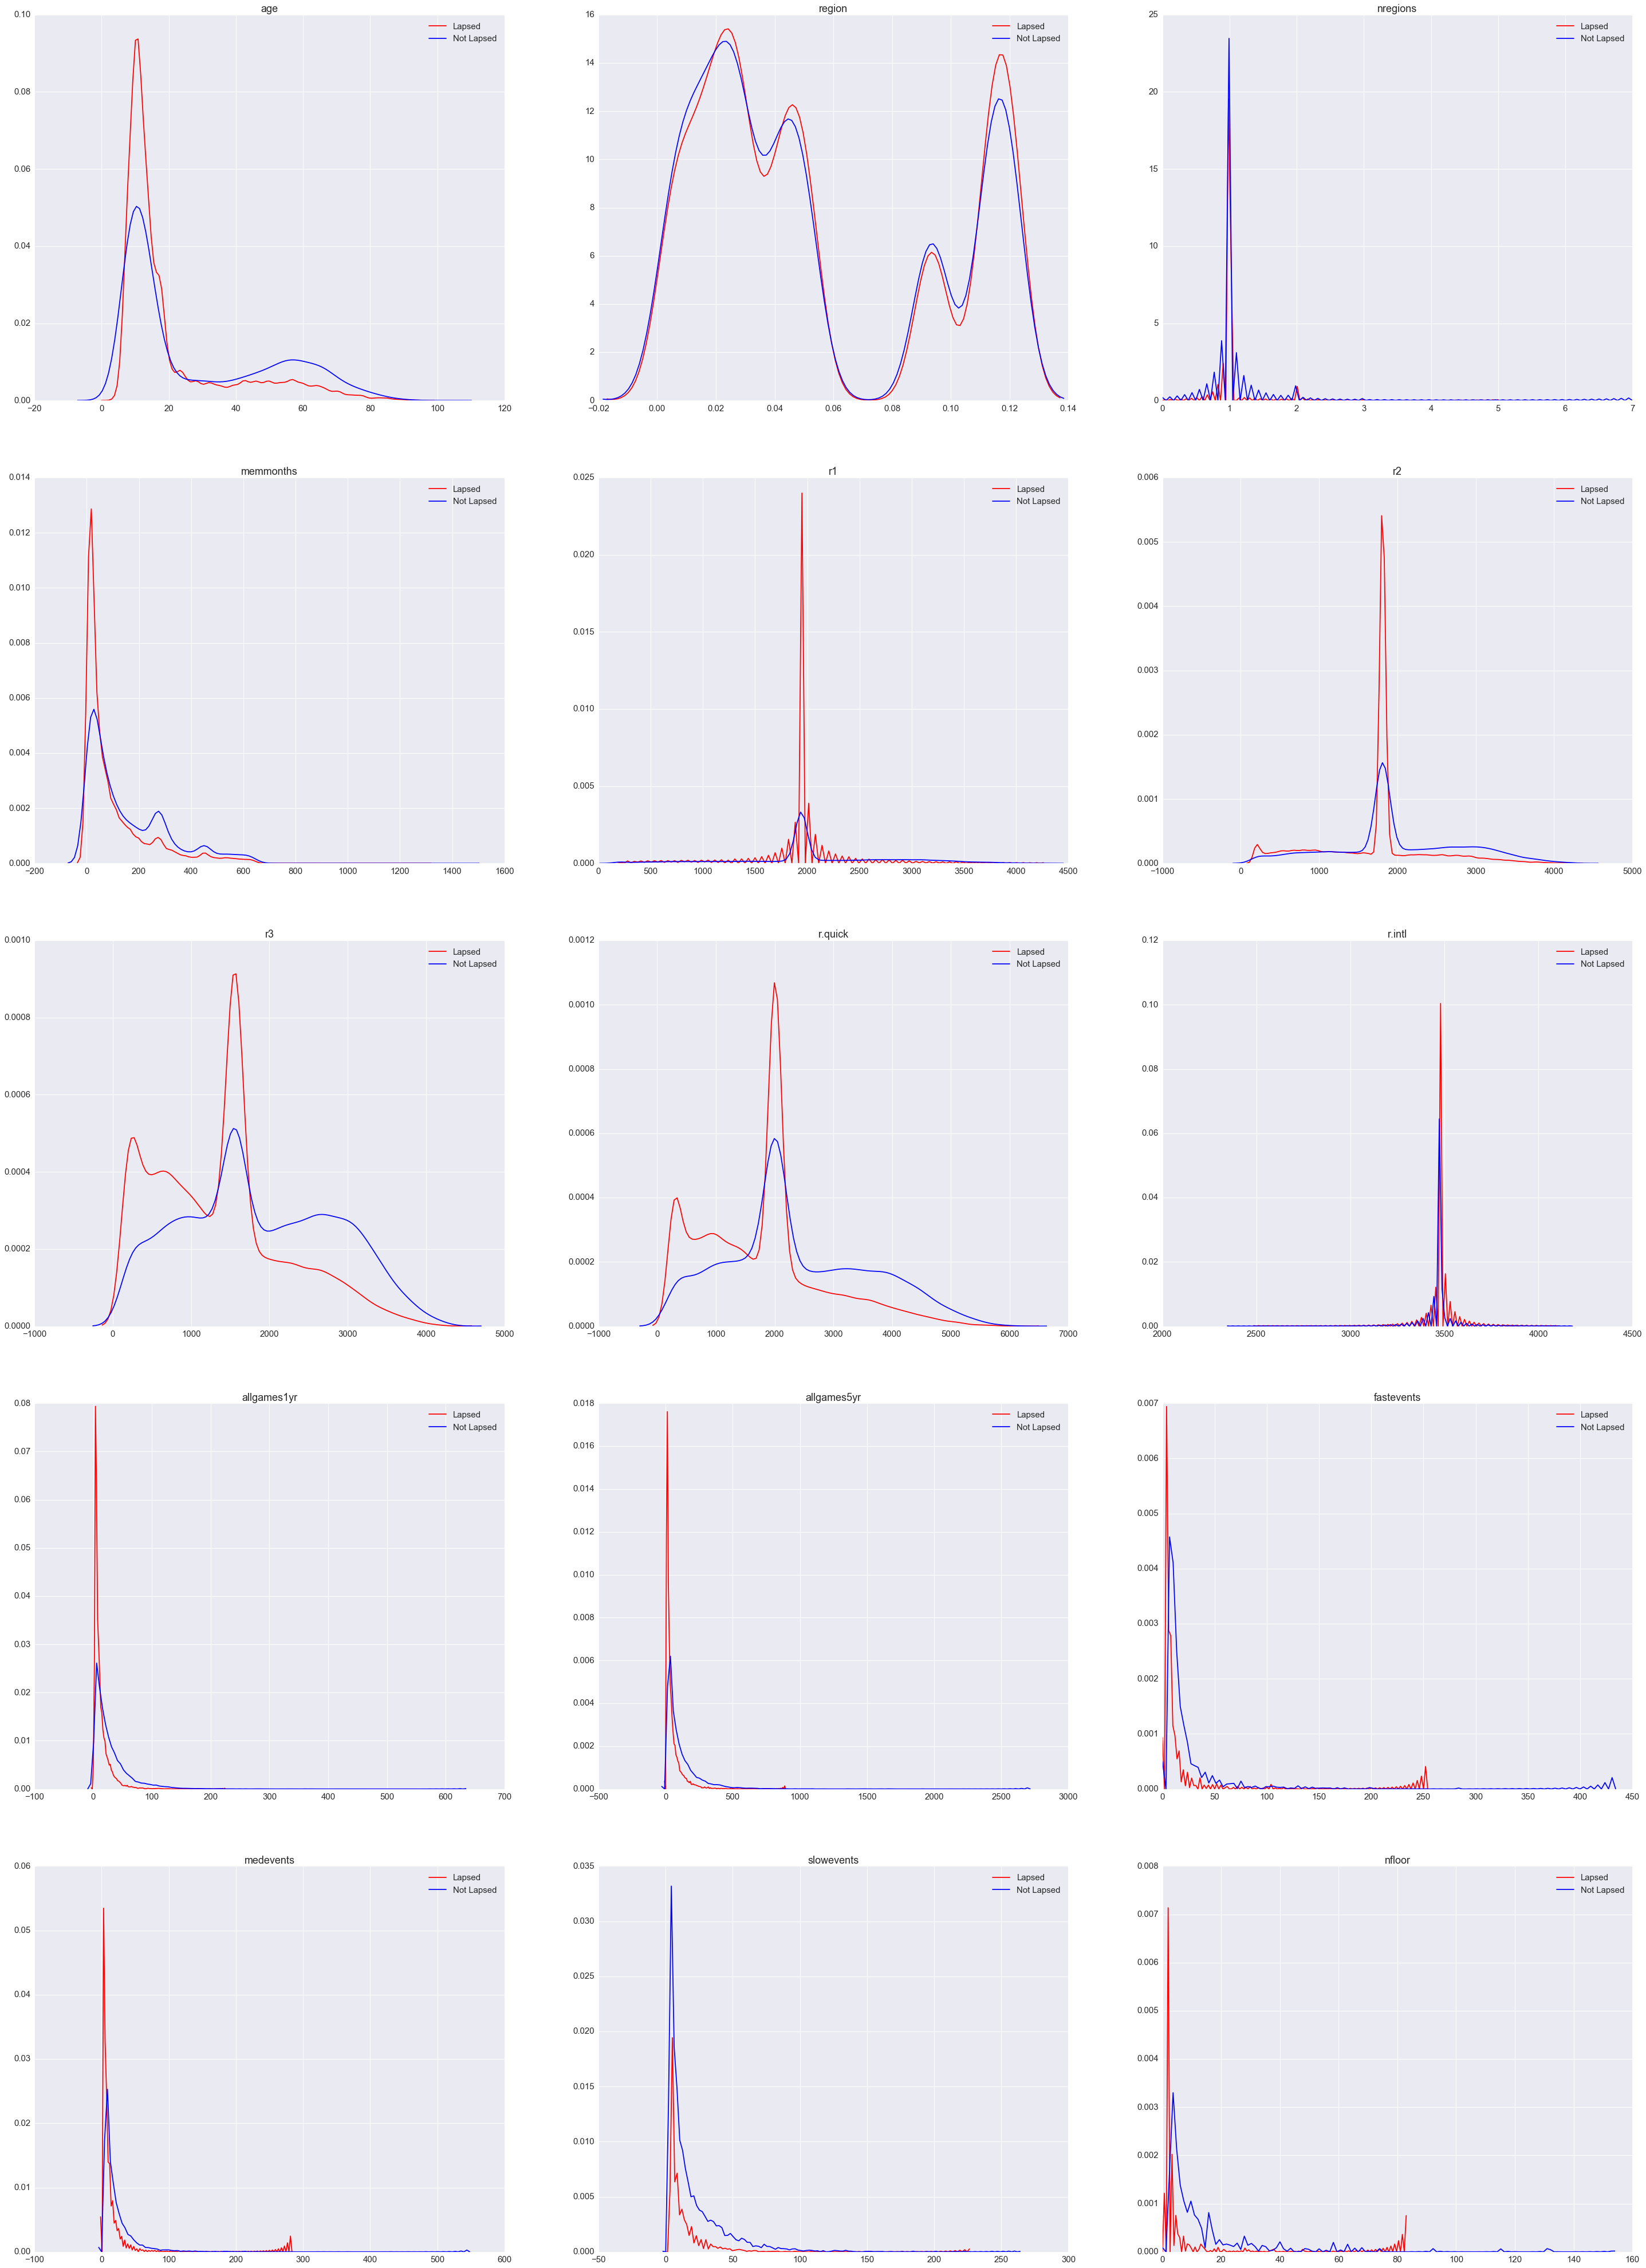

In [437]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(50, 70))  

for ax, ccol in zip(axes.ravel(), STANDARDIZE):
    sns.kdeplot(df_train_only[ccol][df_train_only['RESP']==1], ax=ax, color='r', label = 'Lapsed')
    sns.kdeplot(df_train_only[ccol][df_train_only['RESP']==0], ax=ax, color='b', label = 'Not Lapsed')
    ax.set_title(ccol)

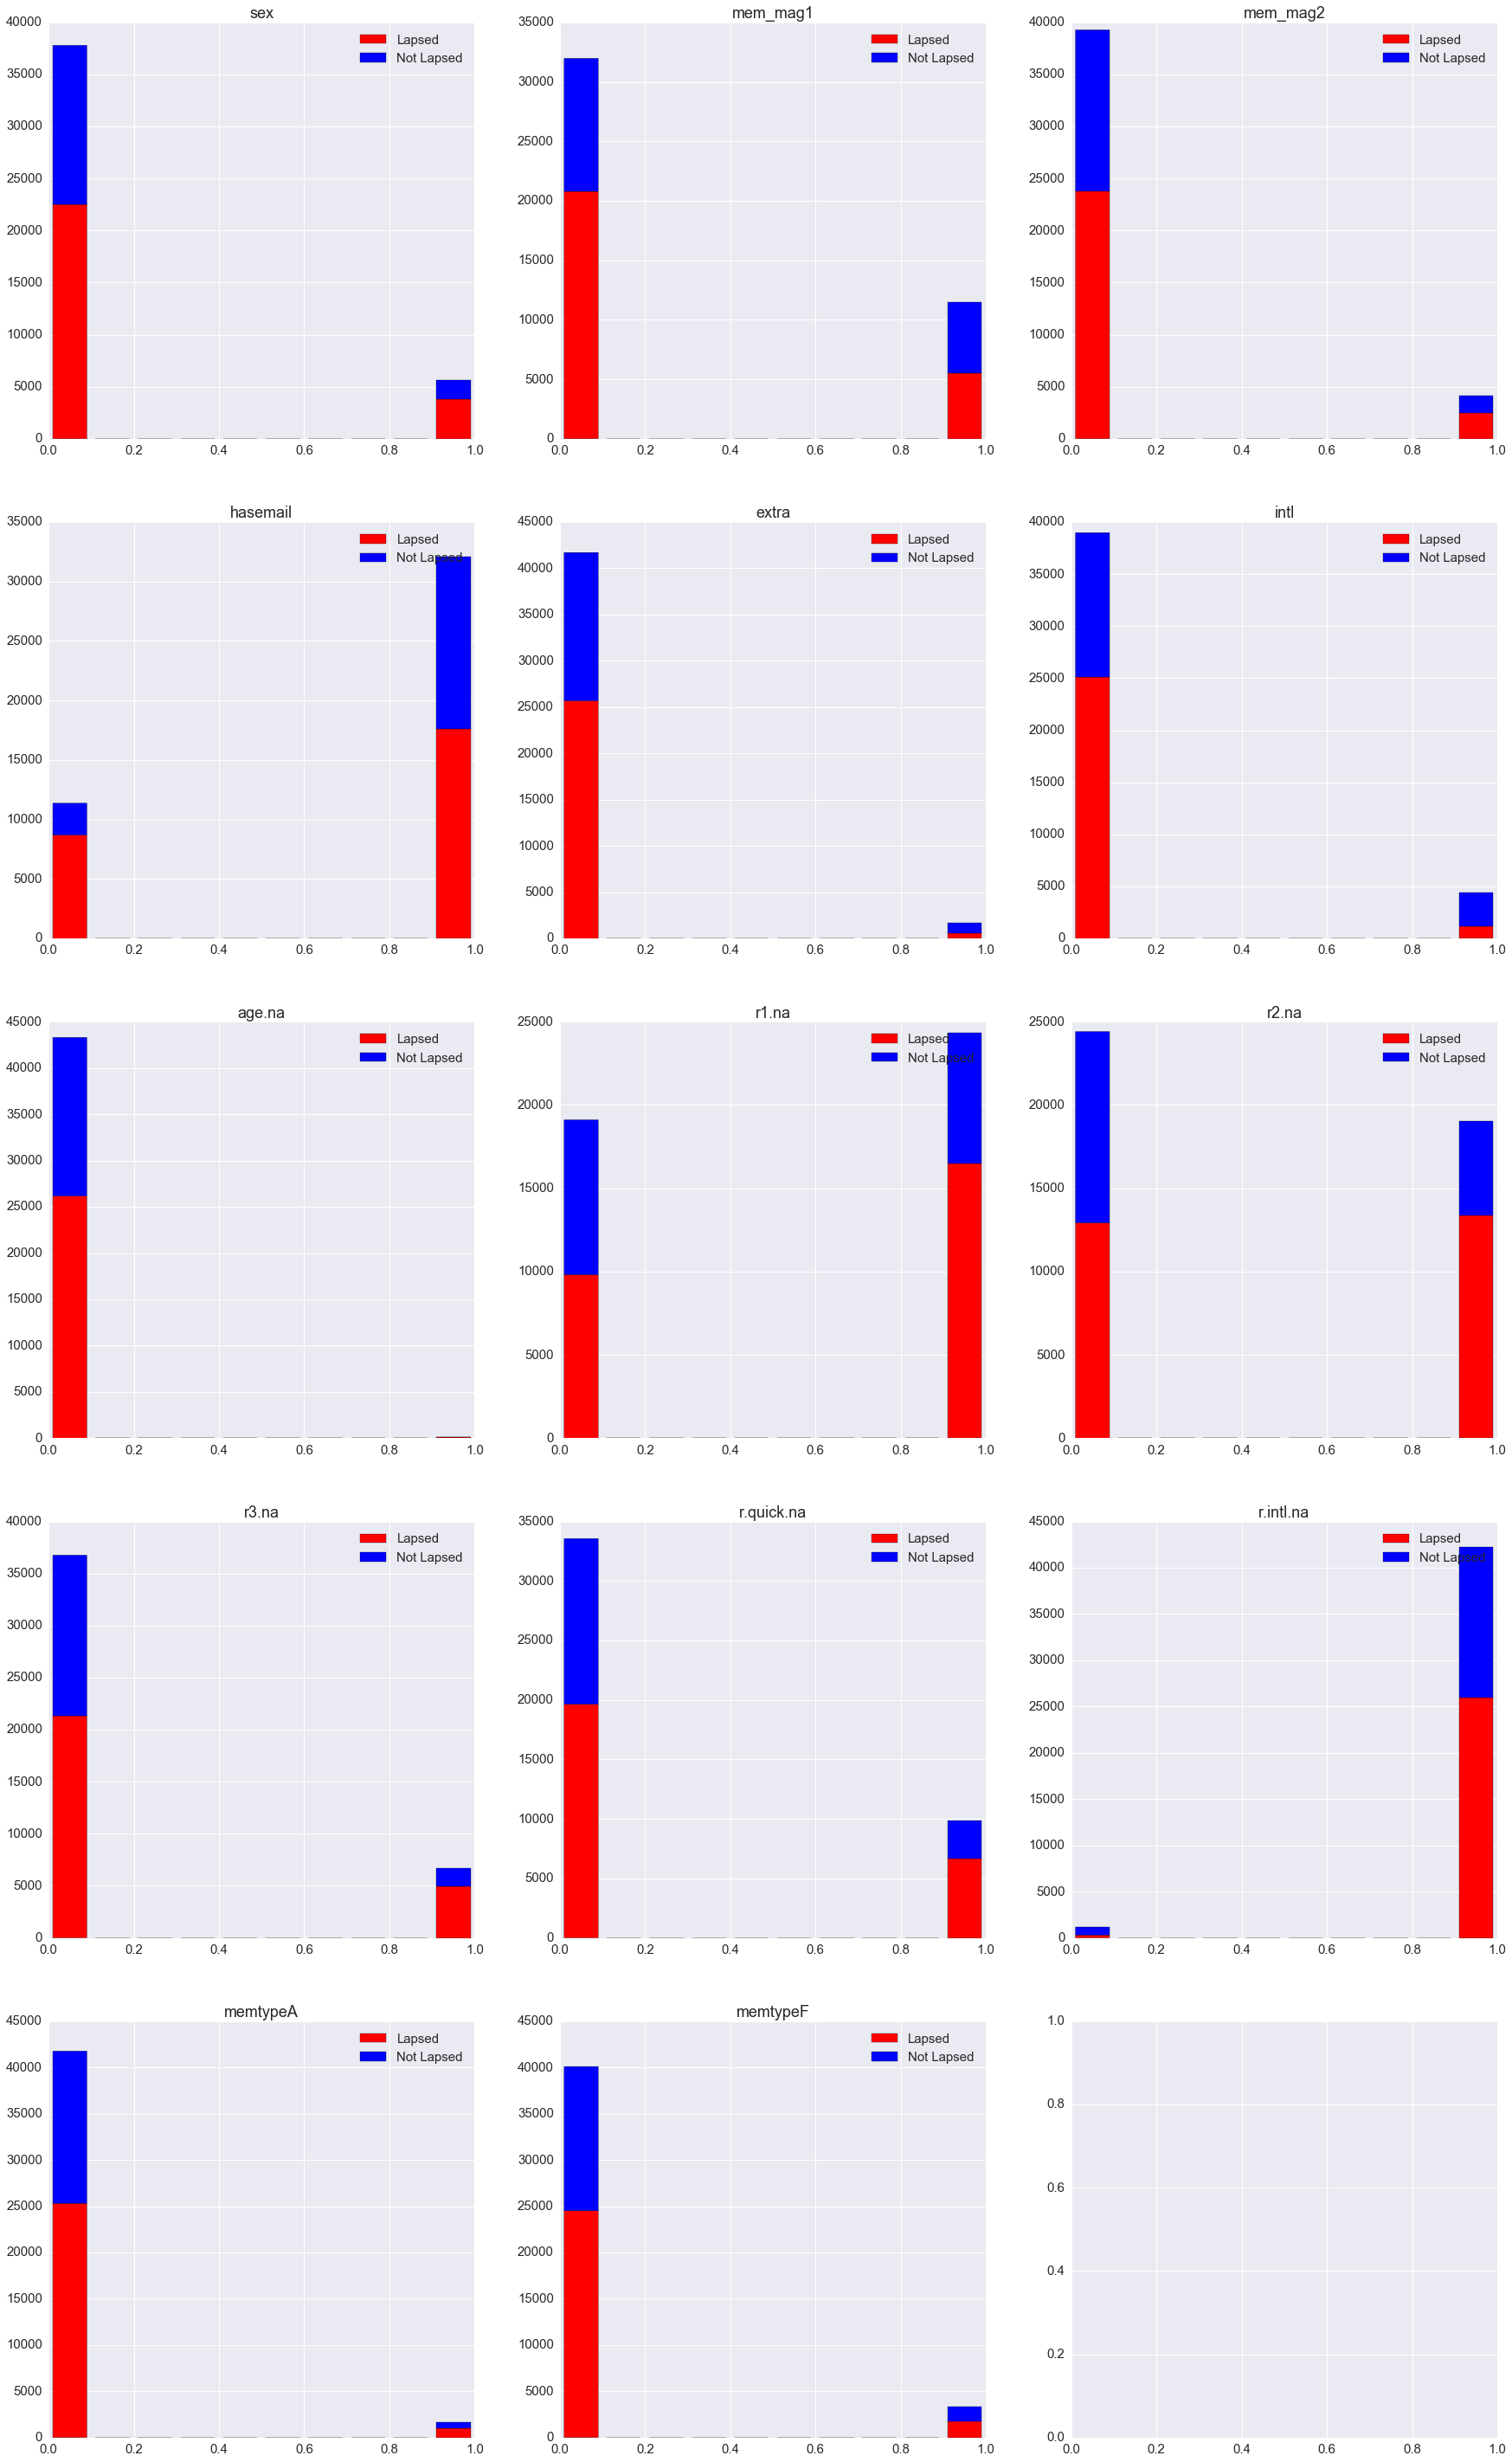

In [440]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(30, 50))    

for ax, ind in zip(axes.ravel(), INDICATORS):
    colors = ['red', 'blue']
    labels = ['Lapsed', 'Not Lapsed']
    ax.hist([df_train_only[df_train_only['RESP']==1][ind], df_train_only[df_train_only['RESP']==0][ind]], 
            stacked=True, color=colors, label=labels)
    ax.set_title(ind)
    ax.legend()

# TODO Standardize Data

In [ ]:
std_scale = preprocessing.StandardScaler().fit(dftouse[mask][STANDARDIZABLE])

std = std_scale.transform(dftouse[STANDARDIZABLE])

dftouse[STANDARDIZABLE] = std

# Split Test and Training Sets

In [ ]:
X_train, Y_train, X_valid, Y_valid = create_train_test_split(traink_x, traink_y, train_size = 0.8)

# Utility Functions

In [312]:
# TODO check predict_proba works
# TODO check 'log_loss' score_func works
    
def get_pred(model, dataframe, train_y, model_name, track_dict=None, test_idx=None, train_size=0.8, columns=None,
                  parameters=None, score_func='log_loss', n_folds=5, predict=False):
    """
    TODO add docs
    Suggested train size: 0.8
    """
    if columns: 
        vals = dataframe[columns].values
    else: 
        vals = dataframe.values

    # Separate prediction data out
    if test_idx:
        x_train_full = vals[:test_idx]
        x_pred = vals[test_idx:]
    else:
        x_train_full = vals

    # Separate data further into training
    x_train, x_test, y_train, y_test = train_test_split(x_train_full, train_y, train_size=train_size)

    # run cross-validation to find best hyper parameters
    if parameters:
        model = cv_optimize(model, parameters, x_train, y_train, n_folds=n_folds, score_func=score_func)
    else: 
        model.fit(x_train, y_train)

    # get train and test set error
    log_loss_train = log_loss(y_train, model.predict_proba(x_train))
    log_loss_val = log_loss(y_test, model.predict_proba(x_test))
    print '############'
    print model
    print '----------'
    print 'Training set error = %0.5f' % log_loss_train
    print 'Test set error = %0.5f' % log_loss_val
    print '----------'
    print '############'
    
    # Keep track of model
    if track_dict: 
        track_dict[model_name] = [model, log_loss_train, log_loss_val]

    # re-train on entire set and predict 
    if predict:         
        # Fit on entire training set
        model = model.fit(x_train_full, train_y)

        # Create predictions on prediction data
        pred = model.predict_proba(x_pred)
        return pred[:, 1]

In [213]:
vals = df_all.values

In [214]:
vals

array([[11.0, 0L, 0.119923565705866, ..., 8.987196820661971, 0L, 0L],
       [61.0, 0L, 0.119923565705866, ..., 15.8799144741735, 0L, 0L],
       [16.0, 1L, 0.119923565705866, ..., 15.7880705667147, 0L, 0L],
       ..., 
       [52.0, 0L, 0.0046505203057371795, ..., 17.8126086152473, 0L, 0L],
       [23.0, 0L, 0.0285247260337048, ..., 18.0042446338835, 0L, 1L],
       [8.0, 0L, 0.11363845657979599, ..., 12.523161809686902, 0L, 1L]], dtype=object)

In [215]:
x_pred = vals[:test_idx]
x_pred

array([[11.0, 0L, 0.119923565705866, ..., 8.987196820661971, 0L, 0L],
       [61.0, 0L, 0.119923565705866, ..., 15.8799144741735, 0L, 0L],
       [16.0, 1L, 0.119923565705866, ..., 15.7880705667147, 0L, 0L],
       ..., 
       [47.0, 0L, 0.0114421217423335, ..., 12.9121952796125, 0L, 0L],
       [7.0, 1L, 0.0488995303434939, ..., 7.19368581839511, 0L, 0L],
       [15.0, 1L, 0.0302053596095405, ..., 15.9248030922036, 0L, 0L]], dtype=object)

In [216]:
x_pred.shape

(43436, 56)

In [217]:
train_y.shape

(43436,)

In [218]:
len(train_y)

43436

In [231]:
x_train, x_test, y_train, y_test = train_test_split(x_pred, train_y, train_size=0.8, random_state=123)

In [233]:
modellr = LogisticRegression()

In [241]:
cv_optimize(modellr, {'C': [1]}, x_train, y_train) # try score_func log_loss

############ GRIDSEARCH
BEST {'C': 1} 0.721768159319 [mean: 0.72177, std: 0.00398, params: {'C': 1}]
############


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [242]:
cv_optimize(modellr, {'C': [1]}, x_train, y_train, score_func='log_loss') # try score_func log_loss

############ GRIDSEARCH
BEST {'C': 1} -0.549845199979 [mean: -0.54985, std: 0.00418, params: {'C': 1}]
############


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [243]:
cv_optimize(modellr, {'C': [5]}, x_train, y_train, score_func='log_loss') # try score_func log_loss

############ GRIDSEARCH
BEST {'C': 5} -0.550435500286 [mean: -0.55044, std: 0.00516, params: {'C': 5}]
############


LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [244]:
cv_optimize(modellr, {'C': [1, 5]}, x_train, y_train, score_func='log_loss') # try score_func log_loss

############ GRIDSEARCH
BEST {'C': 1} -0.549993200222 [mean: -0.54999, std: 0.00428, params: {'C': 1}, mean: -0.55010, std: 0.00479, params: {'C': 5}]
############


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [280]:
def cv_optimize(model, parameters, train_x, train_y, n_folds=5, score_func=None):
    """
    Function
    --------
    cv_optimize

    Inputs
    ------
    model: an instance of a scikit-learn classifier
    parameters: a parameter grid dictionary that is passed to GridSearchCV
    train_x: a samples-features matrix in the scikit-learn style
    train_y: the response vectors of 1s and 0s (+ives and -ives)
    n_folds: the number of cross-validation folds (default 5)
    score_func: a score function we might want to pass (default python None)

    Returns
    -------
    The best estimator from the GridSearchCV, after the GridSearchCV has been used to
    fit the model.

    Notes
    -----
    see do_classify and the code below for an example of how this is used
    """

    if score_func is not None:
        gs = GridSearchCV(model, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs = GridSearchCV(model, param_grid=parameters, cv=n_folds)
    gs.fit(train_x, train_y)

    print '############ GRIDSEARCH'
    print "BEST", gs.best_params_, gs.best_score_
    print "SCORES: ", gs.grid_scores_
    print '############'
    
    best = gs.best_estimator_

    return best

In [281]:
def fit_and_predict(model, df_all, ytrain, test_idx): 
    vals = df_all.values
    x_train = vals[:test_idx]
    x_pred = vals[test_idx:]
    
    # Fit on entire training set
    model = model.fit(x_train, ytrain)

    # Create predictions on prediction data
    pred = model.predict_proba(x_pred)
    return pred[:, 1]

In [282]:
def write_to_file(filename, predict_array, ids):
    predictions = pd.DataFrame({'Id': ids, 'lapsed': predict_array})
        
    # write to csv, with header, drop index
    predictions.to_csv(filename, header=True, index=False)

### Importance list

In [ ]:
# Females
importance_list = clfForest.feature_importances_
name_list = all_features
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
# just get top (in reverse order)
top_imp = importance_list[-20:]
top_names = name_list[-20:]
plt.barh(range(len(top_names)),top_imp,align='center')
plt.yticks(range(len(top_names)),top_names)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Top 20 Features for Females')
plt.show()

## Interactions? 

# Modeling

In [174]:
track_dict = {}

## Logistic Regression

In [ ]:
df_all
test_idx
train_y
test_ids

In [283]:
# KAGGLE: 0.55058 
# test set  0.54623

start = time.time()

modellr = LogisticRegression()

# parameters
penalties = ['l1', 'l2']
cs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0] # default = 1.0
# cs = [0.1, 1]
params = {'penalty': penalties, 'C': cs}
    
predlr = get_pred(modellr, df_all, train_y, 'LR_Ken_asis', track_dict, test_idx=test_idx, train_size=0.8, columns=None,
                  parameters=params, score_func='log_loss', n_folds=5, predict=True)

print '%0.1f seconds runtime' % (time.time() - start)

# write predictions

# option to save fitted model
# joblib.dump(model, 'models/baseline_logistic.pkl')

############ GRIDSEARCH
BEST {'penalty': 'l1', 'C': 1.0} -0.550524931696
SCORES:  [mean: -0.62729, std: 0.00328, params: {'penalty': 'l1', 'C': 1e-05}, mean: -0.58642, std: 0.00380, params: {'penalty': 'l2', 'C': 1e-05}, mean: -0.59236, std: 0.00370, params: {'penalty': 'l1', 'C': 0.0001}, mean: -0.58043, std: 0.00380, params: {'penalty': 'l2', 'C': 0.0001}, mean: -0.58702, std: 0.00373, params: {'penalty': 'l1', 'C': 0.001}, mean: -0.56277, std: 0.00407, params: {'penalty': 'l2', 'C': 0.001}, mean: -0.55807, std: 0.00398, params: {'penalty': 'l1', 'C': 0.01}, mean: -0.55258, std: 0.00458, params: {'penalty': 'l2', 'C': 0.01}, mean: -0.55107, std: 0.00426, params: {'penalty': 'l1', 'C': 0.1}, mean: -0.55209, std: 0.00512, params: {'penalty': 'l2', 'C': 0.1}, mean: -0.55052, std: 0.00420, params: {'penalty': 'l1', 'C': 1.0}, mean: -0.55164, std: 0.00429, params: {'penalty': 'l2', 'C': 1.0}, mean: -0.55056, std: 0.00413, params: {'penalty': 'l1', 'C': 10.0}, mean: -0.55160, std: 0.00437,

In [ ]:
BEST {'penalty': 'l1', 'C': 1} -0.547849871031 [mean: -0.54851, std: 0.00653, params: {'penalty': 'l1', 'C': 0.1}, 
                                                mean: -0.54915, std: 0.00701, params: {'penalty': 'l2', 'C': 0.1}, 
                                                mean: -0.54785, std: 0.00644, params: {'penalty': 'l1', 'C': 1}, 
                                                mean: -0.54838, std: 0.00682, params: {'penalty': 'l2', 'C': 1}]
############

In [262]:
track_dict

{'LR_Ken_asis': [LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False),
  0.54792442961193033,
  0.54938381530612657]}

In [284]:
predlr

array([[ 0.17494678,  0.82505322],
       [ 0.29447561,  0.70552439],
       [ 0.21146844,  0.78853156],
       ..., 
       [ 0.38358007,  0.61641993],
       [ 0.33457598,  0.66542402],
       [ 0.50403006,  0.49596994]])

In [298]:
track_dict

{'LR_Ken_asis': [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False),
  0.54876445420248343,
  0.54623449410449954]}

In [292]:
pre = track_dict['LR_Ken_asis'][0].predict_proba(df_all[:test_idx])

In [293]:
pre

array([[ 0.0676646 ,  0.9323354 ],
       [ 0.55693806,  0.44306194],
       [ 0.4375002 ,  0.5624998 ],
       ..., 
       [ 0.57923674,  0.42076326],
       [ 0.4649841 ,  0.5350159 ],
       [ 0.29697389,  0.70302611]])

In [296]:
log_loss(train_y, pre[:, 1])

# KAGGLE: 0.55058

0.54806499471415682

In [297]:
write_to_file('predictions/LR_Ken_asis.csv', predlr[:, 1], test_ids)

## Random Forest

In [302]:
start = time.time()

modelrf = RandomForestClassifier()

# parameters
estimators = [50, 150, 250] # default = 10
features = [0.3, 0.5, 0.75, 1.0, 'sqrt', 'log2'] # default = 'sqrt'
depths = [None] # default = None (i.e. ignored)
samples = [1, 5, 10, 25] # default = 1
n_jobs = [-1]
params = {'n_estimators': estimators, 'max_features': features, 'max_depth': depths, 'min_samples_leaf': samples, 
         'n_jobs': n_jobs}
    
predrf = get_pred(modelrf, df_all, train_y, 'RF_Ken_asis', track_dict, test_idx=test_idx, train_size=0.8, columns=None,
                  parameters=params, score_func='log_loss', n_folds=5, predict=True)

print '%0.1f seconds runtime' % (time.time() - start)

# write predictions

# option to save fitted model
# joblib.dump(model, 'models/baseline_logistic.pkl')

############ GRIDSEARCH
BEST {'max_features': 0.75, 'n_estimators': 250, 'max_depth': None, 'min_samples_leaf': 25} -0.544330020944
SCORES:  [mean: -0.62861, std: 0.00777, params: {'max_features': 0.3, 'n_estimators': 50, 'max_depth': None, 'min_samples_leaf': 1}, mean: -0.57565, std: 0.00976, params: {'max_features': 0.3, 'n_estimators': 150, 'max_depth': None, 'min_samples_leaf': 1}, mean: -0.56819, std: 0.00315, params: {'max_features': 0.3, 'n_estimators': 250, 'max_depth': None, 'min_samples_leaf': 1}, mean: -0.55371, std: 0.00327, params: {'max_features': 0.3, 'n_estimators': 50, 'max_depth': None, 'min_samples_leaf': 5}, mean: -0.55000, std: 0.00251, params: {'max_features': 0.3, 'n_estimators': 150, 'max_depth': None, 'min_samples_leaf': 5}, mean: -0.54951, std: 0.00232, params: {'max_features': 0.3, 'n_estimators': 250, 'max_depth': None, 'min_samples_leaf': 5}, mean: -0.54799, std: 0.00256, params: {'max_features': 0.3, 'n_estimators': 50, 'max_depth': None, 'min_samples_leaf

In [313]:
# TODO take out gridsearch option, too slow, just loop through
start = time.time()

# parameters
estimators = [250, 350, 500] # default = 10
features = [0.6, 0.75, 0.9] # default = 'sqrt'
depths = [None] # default = None (i.e. ignored)
samples = [25, 35, 45] # default = 1
n_jobs = [-1]
params = {'n_estimators': estimators, 'max_features': features, 'max_depth': depths, 'min_samples_leaf': samples, 
         'n_jobs': n_jobs}

for e in estimators:
    for f in features: 
        for s in samples: 
            modelrf = RandomForestClassifier(n_jobs=-1, n_estimators=e, max_features=f, min_samples_leaf=s)
            get_pred(modelrf, df_all, train_y, 'RF_Ken_asis', track_dict=None, test_idx=test_idx, train_size=0.8, 
                     columns=None, parameters=None, score_func='log_loss', predict=False)

print '%0.1f seconds runtime' % (time.time() - start)

# write predictions

# option to save fitted model
# joblib.dump(model, 'models/baseline_logistic.pkl')

############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.6, max_leaf_nodes=None,
            min_samples_leaf=25, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set error = 0.47597
Test set error = 0.54099
----------
############
############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.6, max_leaf_nodes=None,
            min_samples_leaf=35, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set error = 0.49217
Test set error = 0.54584
----------
############
############
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.9, max_leaf_nodes=None,
            min_samples_leaf=35, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set error = 0.49318
Test set error = 0.53199

# 0.54119 on Kaggle 

# TODO
# more trees, smaller max_features, higher min_samples_leaf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.75, max_leaf_nodes=None,
            min_samples_leaf=45, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------
Training set error = 0.50405
Test set error = 0.53611

In [315]:
modelrf = RandomForestClassifier(n_jobs=-1, n_estimators=350, max_features=0.9, min_samples_leaf=35)
predrf = fit_and_predict(modelrf, df_all, train_y, test_idx)

In [318]:
write_to_file('predictions/RF_Ken_asis2.csv', predrf[:, 1], test_ids)

In [325]:
log_loss(train_y, modelrf.predict_proba(df_all[:test_idx])[:, 1])

0.48887762040303029

## AdaBoost

In [330]:
# TODO use n_jobs=-1

start = time.time()

modelrfada = AdaBoostClassifier()

estimators = [250, 350, 500] # default = 10
features = [0.6, 0.75, 0.9] # default = 'sqrt'
samples = [25, 35, 45] # default = 1
params = {'n_estimators': estimators, 'max_features': features, 'max_depth': depths, 'min_samples_leaf': samples, 
         'n_jobs': n_jobs}

for e in estimators:
    modelrfada = AdaBoostClassifier(n_estimators=e)
    get_pred(modelrfada, df_all, train_y, 'RFAda_Ken_asis', track_dict=None, test_idx=test_idx, train_size=0.8, 
             columns=None, parameters=None, score_func='log_loss', predict=False)

# print '%0.1f seconds runtime' % (time.time() - start)

# write predictions
#write_to_file('predictions/RFada_Ken_asis.csv', predrfada, test_ids)

# option to save fitted model
# joblib.dump(model, 'models/baseline_logistic.pkl')

############
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=250, random_state=None)
----------
Training set error = 0.69148
Test set error = 0.69158
----------
############
############
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=350, random_state=None)
----------
Training set error = 0.69197
Test set error = 0.69211
----------
############
############
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=500, random_state=None)
----------
Training set error = 0.69228
Test set error = 0.69240
----------
############


## ExtraTrees Classifier

In [332]:
# TODO use n_jobs=-1

start = time.time()

estimators = [250, 350, 500] # default = 10
features = [0.6, 0.75, 0.9] # default = 'sqrt'
samples = [25, 35, 45] # default = 1
depths = [None] # default = None (i.e. ignored)
n_jobs = [-1]
params = {'n_estimators': estimators, 'max_features': features, 'max_depth': depths, 'min_samples_leaf': samples, 
         'n_jobs': n_jobs}

for e in estimators:
    for f in features: 
        for s in samples: 
            modelrfextra = ExtraTreesClassifier(n_jobs=-1, n_estimators=e, max_features=f, min_samples_leaf=s)
            get_pred(modelrfextra, df_all, train_y, 'RF_Ken_asis', track_dict=None, test_idx=test_idx, train_size=0.8, 
                     columns=None, parameters=None, score_func='log_loss', predict=False)
print '%0.1f seconds runtime' % (time.time() - start)

# write predictions
#write_to_file('predictions/RFextra_Ken_asis.csv', predrfextra, test_ids)

# option to save fitted model
# joblib.dump(model, 'models/baseline_logistic.pkl')

############
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=0.6, max_leaf_nodes=None,
           min_samples_leaf=25, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
----------
Training set error = 0.49444
Test set error = 0.53207
----------
############
############
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=0.6, max_leaf_nodes=None,
           min_samples_leaf=35, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
----------
Training set error = 0.50633
Test set error = 0.54558
----------
############
############
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, m

In [ ]:
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=0.75, max_leaf_nodes=None,
           min_samples_leaf=25, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
----------
Training set error = 0.48969
Test set error = 0.53288


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=0.6, max_leaf_nodes=None,
           min_samples_leaf=25, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
----------
Training set error = 0.49444
Test set error = 0.53207

## Gradient Boosting Trees

In [342]:
modelboost = GradientBoostingClassifier(n_estimators=500, max_features=0.75, min_samples_leaf=35, max_depth=3)

predboost = fit_and_predict(modelboost, df_all, train_y, test_idx)


In [347]:
predboost

array([[ 0.15995633,  0.84004367],
       [ 0.33497891,  0.66502109],
       [ 0.18132659,  0.81867341],
       ..., 
       [ 0.49257866,  0.50742134],
       [ 0.2894821 ,  0.7105179 ],
       [ 0.51221351,  0.48778649]])

In [344]:
log_loss(train_y, modelboost.predict_proba(df_all[:test_idx])[:, 1])
 
# Kaggle 0.53411
# validation 0.50710

0.50945267198479394

In [345]:
write_to_file('predictions/RFBOOST_Ken_asis.csv', predboost[:, 1], test_ids)

In [ ]:
def write_to_file(filename, predict_array, ids):
    predictions = pd.DataFrame({'Id': ids, 'lapsed': predict_array})
        
    # write to csv, with header, drop index
    predictions.to_csv(filename, header=True, index=False)

In [366]:
train_pred = pd.DataFrame(modelboost.predict_proba(df_all[:test_idx])[:, 1]).rename(columns={0: 'lapsed'})

In [367]:
train_pred

,lapsed
0,0.94
1,0.31
2,0.54
3,0.50
4,0.85
5,0.73
6,0.31
7,0.76
8,0.34
9,0.25


In [368]:
train_pred.to_csv('predictions/train_GBRF.csv', header=True, index=False)

In [371]:
df_all.columns

Index([u'age', u'sex', u'region', u'nregions', u'memmonths', u'mem_mag1', u'mem_mag2', u'hasemail', u'r1', u'r2', u'r3', u'r.quick', u'extra', u'intl', u'r.intl', u'allgames1yr', u'allgames5yr', u'fastevents', u'medevents', u'slowevents', u'nfloor', u'age.na', u'r1.na', u'r2.na', u'r3.na', u'r.quick.na', u'r.intl.na', u'mon_less30', u'mon_31', u'mon_32', u'mon_33', u'mon_34', u'mon_35', u'mon_36', u'mon_37_60', u'mon_61_84', u'mon_85_120', u'mon_121_263', u'mon_264_plus', u'games_0',
       u'games_1_5', u'games_6_10', u'games_11_20', u'games_21_34', u'games_35_49', u'games_50_plus', u'agesq', u'agecbd', u'allgames1yrsq', u'allgames1yrcbd', u'allgames5yrsq', u'allgames5yrcbd', u'memmonthssq', u'memmonthscbd', u'memtypeA', u'memtypeF'],
      dtype='object')

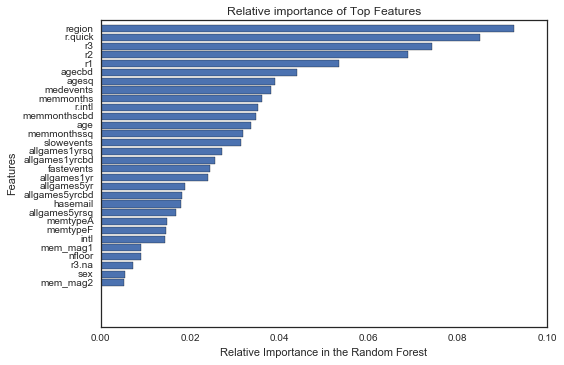

In [375]:
# TODO feature importances??
# Females
importance_list = modelboost.feature_importances_
name_list = df_all.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
# just get top (in reverse order)
top_imp = importance_list[-30:]
top_names = name_list[-30:]
plt.barh(range(len(top_names)),top_imp,align='center')
plt.yticks(range(len(top_names)),top_names)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Top Features')
plt.show()


In [339]:
start = time.time()

# parameters
estimators = [250, 350, 500] # default = 10
features = [0.6, 0.75, 0.9] # default = 'sqrt'
samples = [25, 35, 45] # default = 1
max_depth = [2, 3, 5]

for e in estimators:
    for f in features: 
        for s in samples: 
            for d in max_depth: 
                modelboost = GradientBoostingClassifier(n_estimators=e, max_features=f, min_samples_leaf=s, 
                                                   max_depth=d)
                get_pred(modelboost, df_all, train_y, 'RFBoost_Ken_asis', track_dict=None, test_idx=test_idx, train_size=0.8, 
                         columns=None, parameters=None, score_func='log_loss', predict=False)


# option to save fitted model
# joblib.dump(model, 'models/baseline_logistic.pkl')

############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.53288
Test set error = 0.54246
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.51956
Test set error = 0.53664
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0

In [ ]:
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.75, max_leaf_nodes=None,
              min_samples_leaf=35, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.50710
Test set error = 0.52294


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.9, max_leaf_nodes=None,
              min_samples_leaf=45, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.52056
Test set error = 0.53069


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=35, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.48193
Test set error = 0.53124


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.75, max_leaf_nodes=None,
              min_samples_leaf=45, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=350,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.51498
Test set error = 0.53189

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=350,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.53091
Test set error = 0.53283


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.75, max_leaf_nodes=None,
              min_samples_leaf=35, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.51990
Test set error = 0.53294



GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=0.9, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.53481
Test set error = 0.53373

In [384]:
start = time.time()

# parameters
estimators = [500, 750, 1000] # default = 10
features = [0.6, 0.75, 0.9] # default = 'sqrt'
samples = [25, 40, 55] # default = 1
max_depth = [2, 3, 5]

for e in estimators:
    for f in features: 
        for s in samples: 
            for d in max_depth: 
                modelboost = GradientBoostingClassifier(n_estimators=e, max_features=f, min_samples_leaf=s, 
                                                   max_depth=d)
                get_pred(modelboost, df_all, train_y, 'RFBoost_Ken_asis', track_dict=None, test_idx=test_idx, train_size=0.8, 
                         columns=None, parameters=None, score_func='log_loss', predict=False)


# option to save fitted model
# joblib.dump(model, 'models/baseline_logistic.pkl')

############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.52540
Test set error = 0.53787
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.50429
Test set error = 0.54128
----------
############
############
GradientBoostingClassifier(init=None, learning_rate=0

In [ ]:
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.9, max_leaf_nodes=None,
              min_samples_leaf=55, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.50698
Test set error = 0.52826


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=0.6, max_leaf_nodes=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
----------
Training set error = 0.48362
Test set error = 0.52883

## Generative Classifier - Naive Bayes

In [340]:
from sklearn.naive_bayes import GaussianNB

In [341]:
clfGNB = GaussianNB()
get_pred(clfGNB, df_all, train_y, 'NaiveBayes', track_dict=None, test_idx=test_idx, train_size=0.8, columns=None,
                  parameters=None, score_func='log_loss', predict=False)

############
GaussianNB()
----------
Training set error = 3.62745
Test set error = 3.55768
----------
############


## TODO - SVM Classifier

In [ ]:
# TODO need to standardize data first 

In [ ]:
# TODO 
from sklearn import preprocessing
    
std_scale = preprocessing.StandardScaler().fit(dftouse[mask][STANDARDIZABLE])

std = std_scale.transform(dftouse[STANDARDIZABLE])

dftouse[STANDARDIZABLE] = std

In [ ]:
>>> from sklearn.preprocessing import StandardScaler  
>>> scaler = StandardScaler()  
>>> # Don't cheat - fit only on training data
>>> scaler.fit(X_train)  
>>> X_train = scaler.transform(X_train)  
>>> # apply same transformation to test data
>>> X_test = scaler.transform(X_test)  

In [ ]:
start = time.time()

# model = OneVsRestClassifier(LinearSVC(random_state=0))
model = LinearSVC(random_state=0)

Cs=[0.01, 0.1, 1.0, 10.0, 100.0] # default = 1
# Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] # default = 1
# Cs=[50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
loss = ['squared_hinge', 'hinge'] # default=’squared_hinge’; 'hinge' is another option but cannot be combined with l1 penalty
penalty = ['l1', 'l2'] # default=’l2’
"""
multi_class (default=’ovr’)
Determines the multi-class strategy if y contains more than two classes. "ovr" trains n_classes one-vs-rest 
classifiers, while "crammer_singer" optimizes a joint objective over all classes. While crammer_singer 
is interesting from a theoretical perspective as it is consistent, it is seldom used in practice as it rarely 
leads to better accuracy and is more expensive to compute. If "crammer_singer" is chosen, the options loss, penalty 
and dual will be ignored.
"""

# cross-validation on training set to identify optimal parameters
model = p2.cv_optimize(model, {'C': Cs, 'loss': loss}, X_train, Y_train)
# 'penalty': penalty, 'loss': loss


# fit model on training set with optimal parameters
# check out-of-sample performance using validation set
model = p2.fit_model(model, X_train, Y_train, test_x=X_valid, test_y=Y_valid, title='LinearSVC Features provided',
                     tracker=tracker)

# fit model on entire training set with optimal parameters and make predictions
# model = p2.fit_model(model, X_train_all, Y_train_all)
# Y_test_pred = model.predict(X_test)
# p2.write_predictions(Y_test_pred, test_ids, 'predictions/svc_2_feat only.csv')

print '%0.1f seconds runtime' % (time.time() - start)

## TODO - Neural Nets

In [ ]:
# http://scikit-learn.org/dev/modules/neural_networks_supervised.htmlsklearn 
# http://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
>>> from sklearn.neural_network import MLPClassifier
>>> X = [[0., 0.], [1., 1.]]
>>> y = [0, 1]
>>> clf = MLPClassifier(algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
>>> clf.fit(X, y) 
MLPClassifier(activation='relu', algorithm='l-bfgs', alpha=1e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Voting Classifier

In [392]:
clf1 = LogisticRegression(penalty='l1', C=1)
clf2 = RandomForestClassifier(n_jobs=-1, n_estimators=350, max_features=0.9, min_samples_leaf=35)
clf3 = GradientBoostingClassifier(n_estimators=500, max_features=0.75, min_samples_leaf=35, max_depth=3)


# TODO experiment with weights  weights=[2,1,1]
# predict_proba is not available when voting='hard'
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gb', clf3)], voting='soft')

get_pred(eclf, df_all, train_y, 'voting_ken_asis', track_dict=None, test_idx=test_idx, train_size=0.8, 
             columns=None, parameters=None, score_func='log_loss', predict=False)


# Kaggle 0.53627
# test set 0.53999

############
VotingClassifier(estimators=[('lr', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))],
         voting='soft', weights=None)
----------
Training set error = 0.50911
Test set error = 0.53515
----------
############


In [387]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gb', clf3)], voting='soft')

pred = fit_and_predict(eclf, df_all, train_y, test_idx)

In [389]:
pred

array([[ 0.16105266,  0.83894734],
       [ 0.35037975,  0.64962025],
       [ 0.20162692,  0.79837308],
       ..., 
       [ 0.43029844,  0.56970156],
       [ 0.30937072,  0.69062928],
       [ 0.53114001,  0.46885999]])

In [390]:
write_to_file('predictions/majority_ken.csv', pred[:, 1], test_ids)

In [ ]:
# No weights
############
VotingClassifier(estimators=[('lr', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))],
         voting='soft', weights=None)
----------
Training set error = 0.50992
Test set error = 0.53194
----------
############

############
VotingClassifier(estimators=[('lr', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))],
         voting='soft', weights=None)
----------
Training set error = 0.50829
Test set error = 0.53734
----------
############

### TODO

In [ ]:
# TODO 
# OTHER MODELS TO TRY 
# Model stacking and averaging
# Random/gradient boosting forest with predictions added from multiple models along with actual features

# FIX the square and cubed terms by recentering? 

# STANDARDIZE Polynomial features with interactions - so can use NN
# Try 3rd order polynomial features

# NOTEBOOK 2 POLYNOMIAL FEATURES
# - add features, differences and proportions, splines & interactions (sklearn Polynomial features)
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html




# DONE
# DATA VIZ
# Do Continuous Indicator Graphs showing Yes/No Lapsed Visualization

# - See Sklearn diagram for best model type: LDA? Kneighbors classifier?
# - gradient boosting with more trees - DONE
# - Voting Classifier - DONE

# NOTEBOOK 0 - Ken's original features

# NOTEBOOK 1 STANDARDIZE (using original features from Notebook 0)
# - try standardized data to see if improvement in RF or LR?  
# - model NN, Linear SVC
# - See Sklearn diagram for best model type: LDA? Kneighbors classifier?
